<a href="https://colab.research.google.com/github/natecho07/natecho07/blob/main/Stock_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Techincal Stock Analysis
My Story


As a high schooler who is interested in the stock market, I would frequently read cnbc and Motley's fool and watch youtube videos on the stock market as a way for me to get information. But, I realized that while it was great that I could listen to experts or people more knowledgeable than me, I didn't have my own way of analyzing and choosing stocks. It was then that I decided to come up with my own methodology. I posed the question, how can I combine my technical skill to create a simple way to analyze stock? After coming upon a personal finance portfolio (https://sajalsharma.com/portfolio/) I became inspired to utilize my coding skills for my analysis. 






# General Methods

For my project I decided to utilize the coding language Python and Google Colaboratory. Google Colaboratory is a free coding terminal that allows for  machine learning, data analysis and education. One of the features of Google Colaboratory are forms. Forms allow for users input (https://research.google.com/colaboratory/faq.html)



The datetime statement imports classes that can mamipulate dates and times. (https://docs.python.org/3/library/datetime.html)

The matplotlib.pyplot as plt import statement imports interactive plots that are in a matlab style. (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) 

The pandas import statmeent imports the pandas library which allows for matplotlib data visualizations and NumPy for mathematical operations. (https://mode.com/python-tutorial/libraries/pandas/#:~:text=Pandas%20is%20a%20Python%20library%20for%20data%20analysis.&text=Pandas%20is%20built%20on%20top,NumPy's%20methods%20with%20less%20code.)







The yfinance import package is yfinance that offers a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance. This package needs to be installed since Google Colab doesn't come with this package. The code below takes in a code ticker symbol and stores it in the stock variable. This allows for us to use functions to analyze any stock inputed. 

https://pypi.org/project/yfinance/


yf.pdr_override is the pandas data reader

In [ ]:
import pandas as pd
import pandas_datareader.data as pdr 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
!pip install yfinance --upgrade --no-cache-dir &> /dev/null

Enter in a stock ticker symbol. For example, SQ or TSLA. The stock enterd here will be analyzed in the code below. 

In [ ]:
import yfinance as yf
yf.pdr_override()
stock = "TSLA" #@param {type:"string"}

In [ ]:
#Setting the end date to today
end = datetime.datetime.now()
#Start date set to 1 year back
start = datetime.datetime(end.year-1,end.month,end.day) 

In [ ]:
df = pdr.get_data_yahoo(stock, start=start)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000
2021-01-28,820.000000,848.000000,801.000000,835.429993,835.429993,26378000
2021-01-29,830.000000,842.409973,780.099976,793.530029,793.530029,34990800
2021-02-01,814.289978,842.000000,795.559998,839.809998,839.809998,25391400
2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200


The above is the top 5 rows of the df data table that stores historical market data for the stock selected.

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,795.296890,811.783068,776.255867,794.193975,794.193975,2.693674e+07
std,173.924120,179.561337,167.026592,173.342956,173.342956,1.134955e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,670.187500,684.324997,652.210007,668.179993,668.179993,1.885125e+07
50%,727.400024,741.479980,713.535004,731.569977,731.569977,2.478520e+07
75%,913.325012,934.439911,889.750015,916.220016,916.220016,3.201715e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,8.939650e+07


Table 1. Descriptive statistics of Square stock that shows price and volume. 

In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Bollinger Bands


A Bollinger Band is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a stock's price, but which can be adjusted to user preferences. In our formula, we use the typical price[1] to determine the standard deviations. Bollinger bands are used to determine whether the stock is overpriced. If the price is close to the upper band, then the stock is overbought on the market. If the price is closer to the lower band, the sotck is more oversold in the market. Bollinger bands also show what is called a squeeze. A Sqeeze is when the 2 bollinger bands are come close together. This signals that the stock is less volatile and a potential indicator of trading oppurtunities. Conversly, if the 2 bollinger bands are far apart, it signals the stock is volatile. Breakouts occur when there is price action above or below the 2 bollinger bands. Since 90% of price actions usually occurs between the 2 bands a breakout is a major event. Typically, if there is a breakout avobe the upper bollinger bands, experts expect the stock price to go down and  revert back to the mean. If there is a breakout below the lower bollinger bands, the price of the stock is expected to increase moving closer to the mean. This is called mean reversion. 




https://www.investopedia.com/terms/b/bollingerbands.asp


$$
\begin{array}{l}
\mathrm{BOLU}=\mathrm{MA}(\mathrm{TP}, n)+m * \sigma[\mathrm{TP}, n] \\
\mathrm{BOLD}=\mathrm{MA}(\mathrm{TP}, n)-m * \sigma[\mathrm{TP}, n] \\
\text { where: } \\
\mathrm{BOLU}=\text { Upper Bollinger Band } \\
\mathrm{BOLD}=\text { Lower Bollinger Band } \\
\mathrm{MA}=\text { Moving average } \\
\mathrm{TP}(\text { typical price })=(\text { High }+\text { Low }+\text { Close }) \div 3 \\
n=\text { Number of days in smoothing period (typically 20) } \\
m=\text { Number of standard deviations (typically 2) } \\
\sigma[\mathrm{TP}, n]=\text { Standard Deviation over last } n \text { periods of TP }
\end{array}
$$

Add a new column called typical_price to the dataframe. The typical price is used in the Bollinge Band graph to visualize the relationship between the bands and the price. 

Calculate the 100 day moving average of the typical price and store it in the dataframe as 100ma. 

Find the 100 day standard deviation and store it in the dataframe as 100sd. 




In [ ]:
df['typical_price'] = ((df['High'] +df['Low'] + df['Close']) / 3)

df['100ma'] = df['typical_price'].rolling(window=100, min_periods = 0).mean()

df['100sd'] = df['typical_price'].rolling(window=100, min_periods = 0).std()
df.head()

,Open,High,Low,Close,Adj Close,Volume,typical_price,100ma,100sd
Date,,,,,,,,,
2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000,871.439982,871.439982,NaN
2021-01-28,820.000000,848.000000,801.000000,835.429993,835.429993,26378000,828.143331,849.791656,30.615356
2021-01-29,830.000000,842.409973,780.099976,793.530029,793.530029,34990800,805.346659,834.976657,33.572349
2021-02-01,814.289978,842.000000,795.559998,839.809998,839.809998,25391400,825.789998,832.679993,27.793891
2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200,865.163330,839.176660,28.114209


Use the slider to choose the number of standard deviations (m) away from the 100 day moving average for the bollinger bands. Typically Bollinger Bands are 2 standard deviations away from the moving average. 


In [ ]:
m = 2 #@param {type:"slider", min:0, max:10, step:1}


Visualize price action and bollinger bands across trading day and typical price. On the bottom is a bar chart visualizing trading volume for each day. 

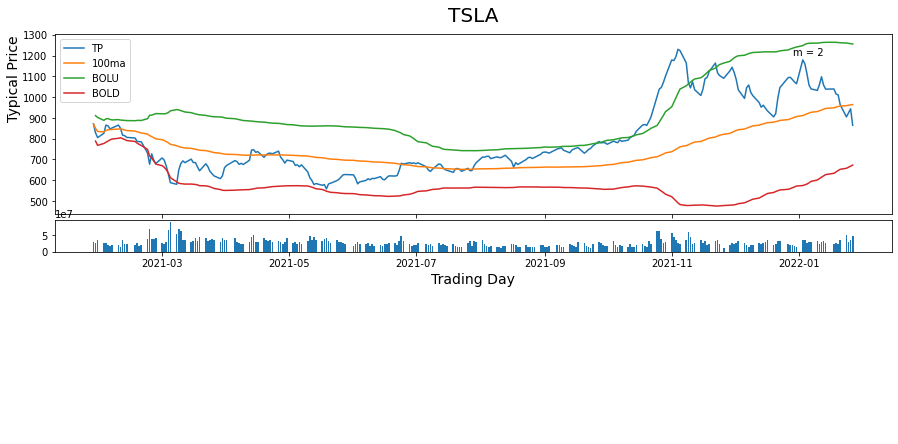

In [ ]:
f = plt.figure()
f.set_figwidth(15)
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['typical_price'])
ax1.plot(df.index, df['100ma'])
ax1.plot(df.index, df['100ma'] + df['100sd'] * m) 
ax1.plot(df.index, df['100ma'] - df['100sd'] * m)
ax2.bar(df.index, df['Volume'])
ax1.legend(["TP", "100ma", "BOLU", "BOLD"])
plt.xlabel("Trading Day", fontsize=14)
plt.ylabel( " " * 70 + "Typical Price", labelpad=20, fontsize = 14)
ax1.text(0.90, 0.90, "m = " + str(m), horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.5, 1.1, stock, horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes, fontsize=20)
graph = plt.show()

**Figure 1. Bollinger bands of the 100 day moving average with volume.** M is the variable that indicates the number of standard deviations from the 100 day moving average. The code above plots the 100 day moving average and the upper and lower bollinger bands across the trading day and the typical price. Using the slider above, you can adjust the number of standard deviations away from the 100 day moving average. 



# Results
The typical price of Square (SQ) gradually increased as time went on. The total price ranged from \$160 to \$240 (Figure 1).
The 100 day moving average has been steadily rising in the past year as of today October 30, 2021. In the last year, there have been a total of 4 breakout points. 3 of the 4 breakout points have been above the upper bollinger bands signifying that Square was overvalued during those 3 time periods. After each time, the total price went down reverting closer to the 100 day moving average.  Currently, the total price is very close to the 100 day moving average. 


# Monte Carlo Simulation


Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models. The Monte Carlo simulation runs a large amount of simulations to simulate the price of the an individual stock for a specific amount of time. The simulation then shows the possible range of prices of the stock after that specific amount of time. 

https://www.investopedia.com/terms/m/montecarlosimulation.asp



Plots the density of each typical price using seaborn's displot method.

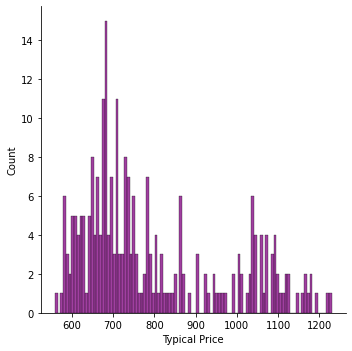

In [ ]:
figure_2 = sns.displot(df['typical_price'].dropna(),bins=100,color='purple');
figure_2 = figure_2.set_axis_labels(x_var="Typical Price")


**Figure 2. Typical price distribution.** Seaborn was used create this plot distribution. 


In [ ]:
df['pct_change'] = df['typical_price'].pct_change()
df = df.dropna()
df.head()


,Open,High,Low,Close,Adj Close,Volume,typical_price,100ma,100sd,pct_change
Date,,,,,,,,,,
2021-01-28,820.000000,848.000000,801.000000,835.429993,835.429993,26378000,828.143331,849.791656,30.615356,-0.049684
2021-01-29,830.000000,842.409973,780.099976,793.530029,793.530029,34990800,805.346659,834.976657,33.572349,-0.027527
2021-02-01,814.289978,842.000000,795.559998,839.809998,839.809998,25391400,825.789998,832.679993,27.793891,0.025385
2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200,865.163330,839.176660,28.114209,0.047680
2021-02-03,877.020020,878.080017,853.059998,854.690002,854.690002,18343500,861.943339,842.971107,26.808841,-0.003722


The above code calculates the percent change of the typical price and adds it to the pandas data frame as the last column in the table as seen above. 

In [ ]:
df = df.dropna()

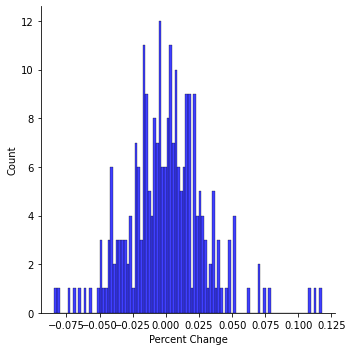

In [ ]:
graph = sns.displot(df['pct_change'].dropna(),bins=100,color='blue')
graph = graph.set_axis_labels(x_var="Percent Change")


**Figure 3. Percent Change Distribution.** Seaborn was used create this plot distribution. Percent change is the the change in typical price.

To calculate the Monte Carlo Simulation, we first need to calculate the the mean of the percent change and the standard deviatino of the percent change.

In [ ]:
days = 365 
#delta t
dt = 1/365
mu = df['pct_change'].mean()
sigma = df['pct_change'].std()

The following function is used to run the Monte Carlo Simuation. It takes the start_price, days, mean of the percent change of total price, and the standard deviation of the percent change of total price. It returns a price path. 

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days) 
    drift = np.zeros(days)
    # I changed for x in xrange to x in range to make it compatible with Python3
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

above code credit: https://sajalsharma.com/portfolio/tech_stock_analysis

The Monte Carlo simulation here for Square stock shows the possible prices after a specific amount of days. After 50 days, the simulation shows that the range of price is from \$247 to \$263. This is useful information for traders looking to use put options. 

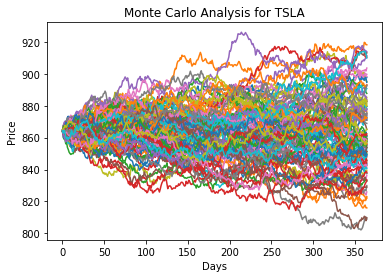

In [ ]:
#use the start price of the typical price not the open
start_price = df.typical_price[-1]


for run in range(100):
  single_pred = stock_monte_carlo(start_price,days,mu,sigma)
  monte = plt.plot(single_pred)
  single_table = []
  single_table.append(single_pred)

monte = plt.xlabel('Days')
monte = plt.ylabel('Price') 
monte = plt.title('Monte Carlo Analysis for ' + stock)



**Figure 4. Monte Carlo Analysis Graph** Runs 10,000 simulations of a Square stock price over 365 days. 

In [ ]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

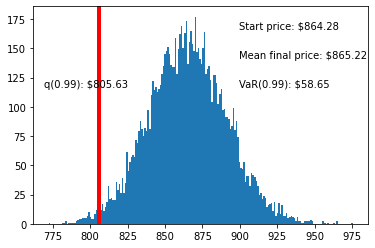

In [ ]:
q = np.percentile(simulations,1)
a = plt.hist(simulations,bins=200);
a = plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)
a = plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())
a = plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))
a = plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
a = plt.axvline(x=q, linewidth=4, color='r')

**Figure 5. Distribution plot of final price** This distribution also shows the risk at the desired confidence interval. THe price is the amount we would be risking 99% of the time. 